# 1. Dataset check

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
sns.set(font_scale = 2.5)

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [4]:
df_train = pd.read_csv('./data/train.csv')
df_test = pd.read_csv('./data/test.csv')

In [5]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train.describe()
df_train.shape

(891, 12)

In [7]:
df_test.describe()
df_test.shape #  test set 에 null 데이터가 더 많음

(418, 11)

In [8]:
for col in df_train.columns:
    msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100 * (df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :   Survived	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 19.87%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.00%
column :      Cabin	 Percent of NaN value : 77.10%
column :   Embarked	 Percent of NaN value : 0.22%


In [9]:
print(df_train[col].isnull().sum())
print(df_train.shape[0]) # row 갯수
print(df_train.shape[1]) # col 갯수

2
891
12


In [10]:
for col in df_test.columns :
    msg = 'column : {:>10}\t Percent of NaN value : {:.2f}%'.format(col, 100*(df_test[col].isnull().sum() / df_test.shape[0]))
    print(msg)

column : PassengerId	 Percent of NaN value : 0.00%
column :     Pclass	 Percent of NaN value : 0.00%
column :       Name	 Percent of NaN value : 0.00%
column :        Sex	 Percent of NaN value : 0.00%
column :        Age	 Percent of NaN value : 20.57%
column :      SibSp	 Percent of NaN value : 0.00%
column :      Parch	 Percent of NaN value : 0.00%
column :     Ticket	 Percent of NaN value : 0.00%
column :       Fare	 Percent of NaN value : 0.24%
column :      Cabin	 Percent of NaN value : 78.23%
column :   Embarked	 Percent of NaN value : 0.00%


<AxesSubplot:>

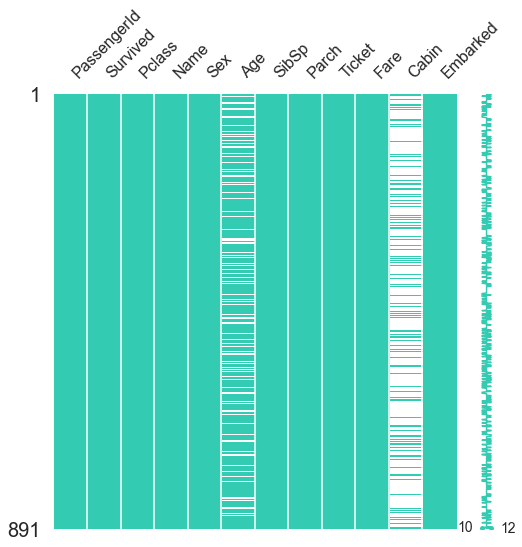

In [11]:
# indexing location 
msno.matrix(df = df_train.iloc[:,:] , figsize=(8,8), color=(0.2,0.8,0.7))

<AxesSubplot:>

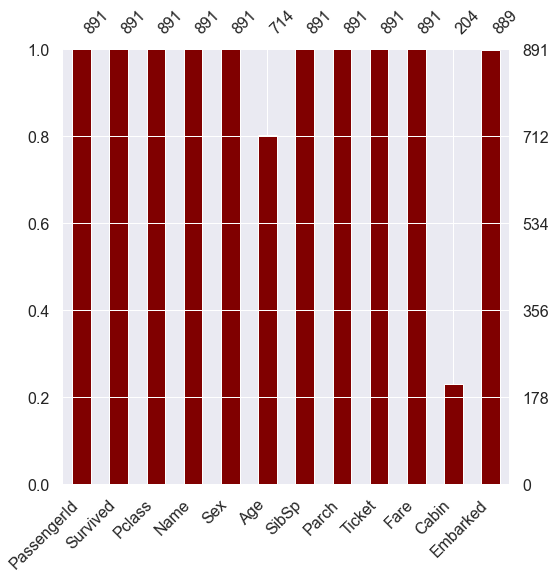

In [12]:
msno.bar(df = df_train , figsize = (8,8), color = (0.5,0,0))

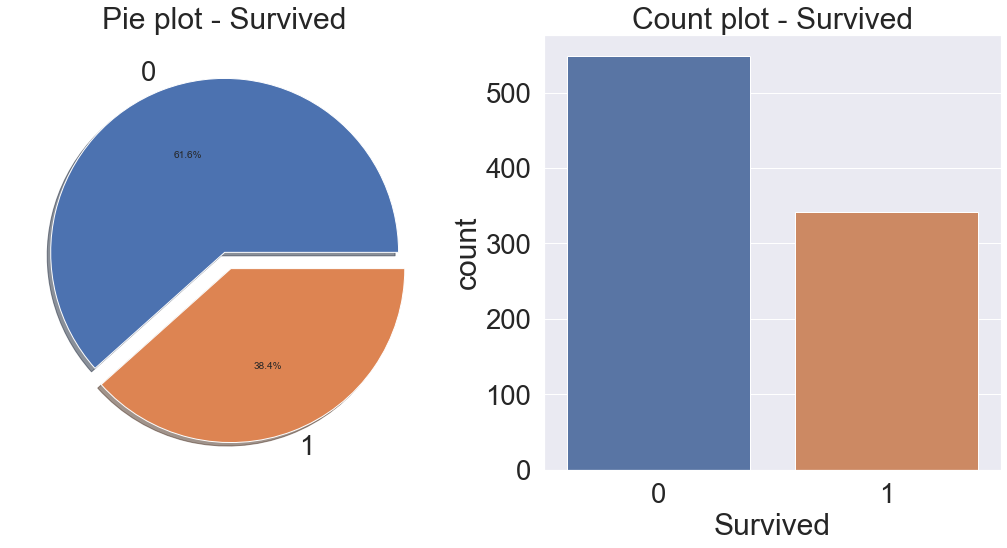

In [13]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

df_train['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df_train, ax=ax[1])
ax[1].set_title('Count plot - Survived')

plt.show()

# EDA

 ### Pclass

In [14]:
print('Pclass 별 승객수')
df_train[['Pclass','Survived']].groupby(['Pclass'], as_index = True).count()

Pclass 별 승객수


,Survived
Pclass,
1,216
2,184
3,491


In [15]:
print('Pclass 별 생존자수')
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).sum()

Pclass 별 생존자수


,Survived
Pclass,
1,136
2,87
3,119


In [16]:
print('Pclass 별 생존확률')
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean()

Pclass 별 생존확률


,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


In [17]:
pd.crosstab(df_train['Pclass'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')
# cmap = colormaps 검색

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


<AxesSubplot:xlabel='Pclass'>

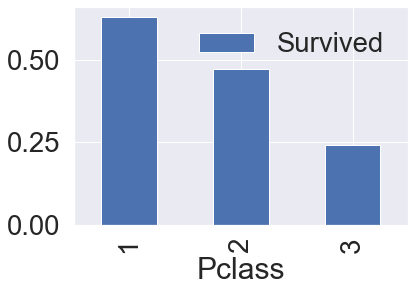

In [18]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar()

<AxesSubplot:>

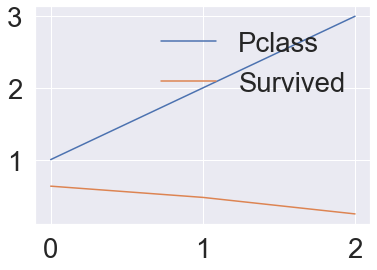

In [19]:
# as_index = False
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False).plot()

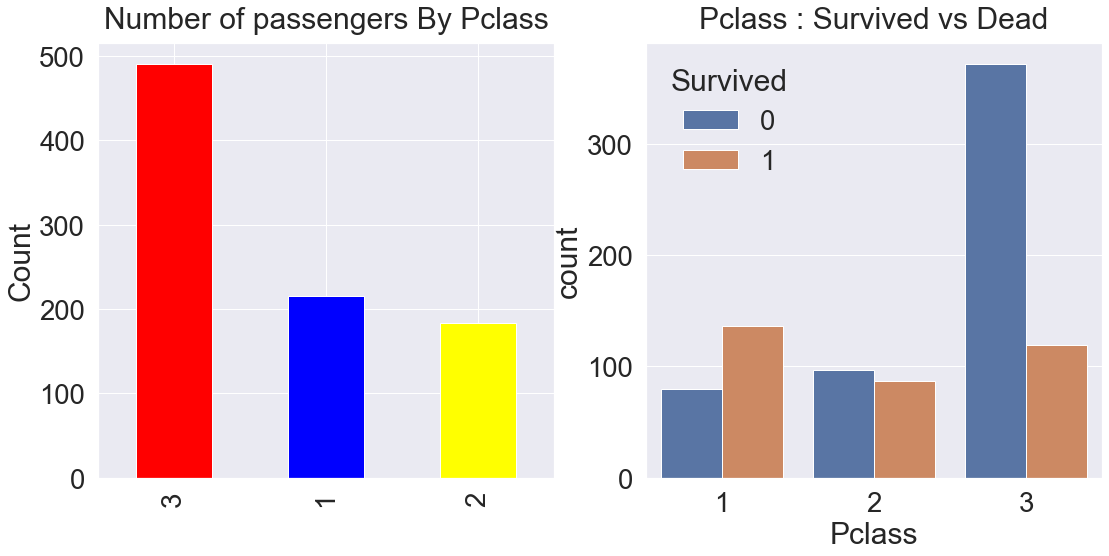

In [20]:
y_position = 1.02
f, ax =plt.subplots(1, 2, figsize = (18,8))
df_train['Pclass'].value_counts().plot.bar(color = ['red', 'blue', 'yellow'], ax = ax[0])
ax[0].set_title('Number of passengers By Pclass' , y = y_position)
ax[0].set_ylabel('Count')

sns.countplot('Pclass', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Pclass : Survived vs Dead', y = y_position)

plt.show()

### Sex

In [21]:
df_train[['Sex', 'Survived']].groupby(['Sex'], as_index = True).mean()

,Survived
Sex,
female,0.742038
male,0.188908


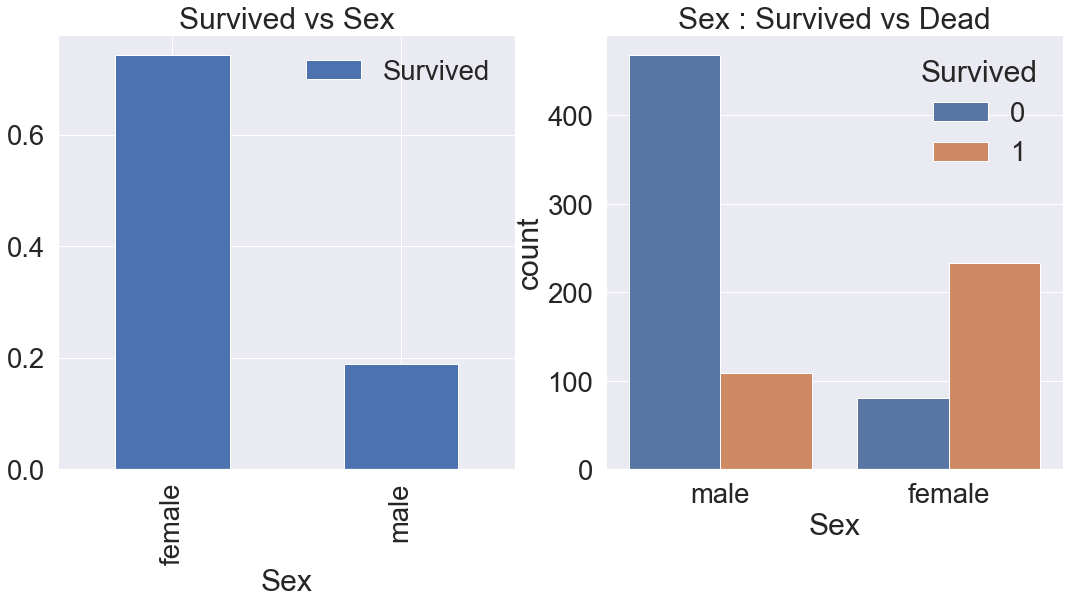

In [22]:
f, ax = plt.subplots(1, 2, figsize=(18,8))
df_train[['Sex','Survived']].groupby(['Sex'], as_index = True).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue = 'Survived', data = df_train, ax = ax[1])
ax[1].set_title('Sex : Survived vs Dead')

plt.show()

In [23]:
pd.crosstab(df_train['Sex'], df_train['Survived'], margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


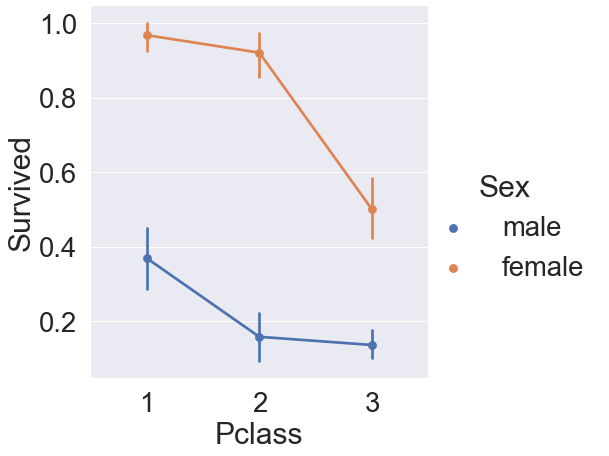

In [24]:
sns.factorplot('Pclass', 'Survived', hue = 'Sex', data = df_train, size = 6)

### Age

In [25]:
print('제일 나이 많은 탑승객 : {:.1f} year'.format(df_train['Age'].max()))
print('제일 나이 어린 탑승객 : {:.1f} year'.format(df_train['Age'].min()))
print('탑승객 평균 나이 : {:.1f} year'.format(df_train['Age'].mean()))

제일 나이 많은 탑승객 : 80.0 year
제일 나이 어린 탑승객 : 0.4 year
탑승객 평균 나이 : 29.7 year


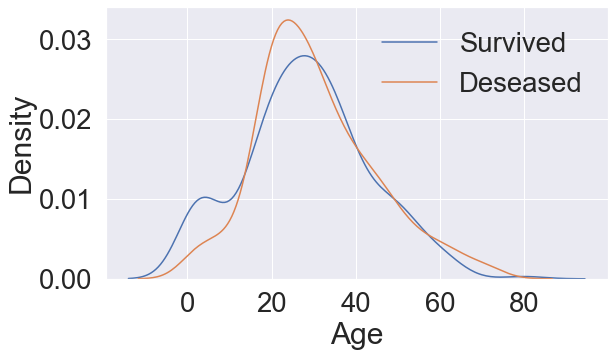

In [26]:
fig, ax = plt.subplots(1 ,1 ,figsize = (9,5))
sns.kdeplot(df_train[df_train['Survived'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[df_train['Survived'] == 0]['Age'], ax = ax)

plt.legend(['Survived', 'Deseased'])
plt.show()

<AxesSubplot:>

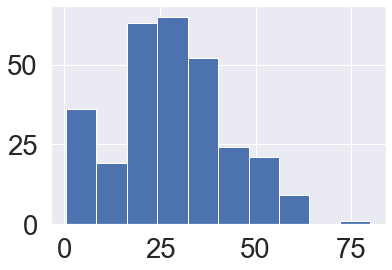

In [27]:
# what is kdeplot?
# 히스토그램 분포를 커널함수를 이용해 굴곡지게 묘사 (추정값)

df_train[df_train['Survived'] == 1]['Age'].hist()

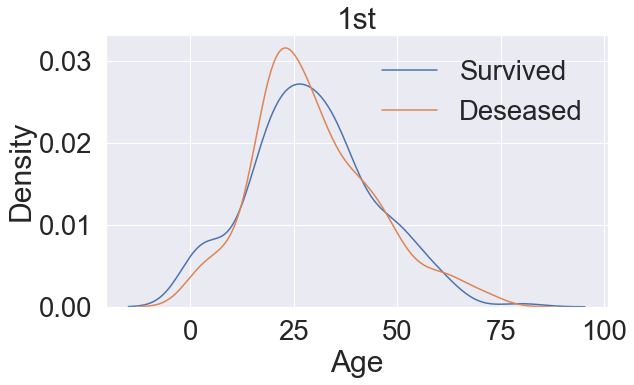

In [28]:
fig, ax = plt.subplots(1 ,1 ,figsize = (9,5))
sns.kdeplot(df_train[(df_train['Survived'] == 1)&df_train['Pclass'] == 1]['Age'], ax = ax)
sns.kdeplot(df_train[(df_train['Survived'] == 0)&df_train['Pclass'] == 1]['Age'], ax = ax)
ax.set_title('1st')

plt.legend(['Survived', 'Deseased'])
plt.show()

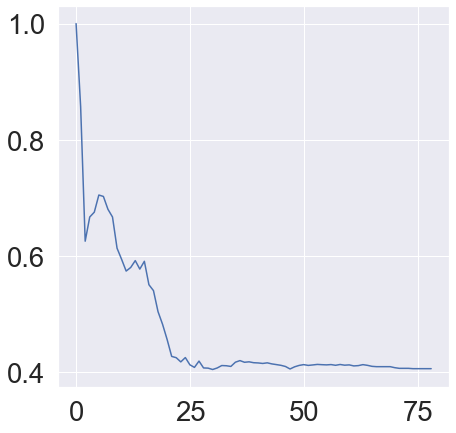

In [29]:
a = []
for i in range(1,80):
    a.append(df_train[df_train['Age'] < i]['Survived'].sum() / len(df_train[df_train['Age'] < i]['Survived']))

plt.figure(figsize = (7,7))
plt.plot(a)

### Pclass, Sex, Age

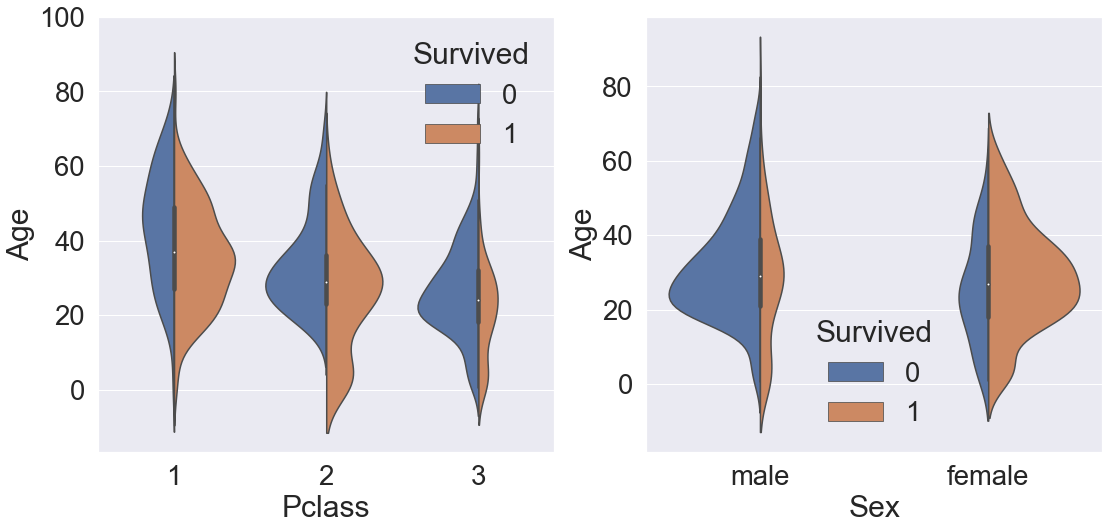

In [35]:
f,ax = plt.subplots(1, 2, figsize=(18,8))
sns.violinplot('Pclass' , 'Age' , hue = 'Survived', data = df_train, scale = 'count' , split = True, ax =ax[0])
ax[0].set_yticks(range(0, 110, 20))

sns.violinplot('Sex' , 'Age' , hue = 'Survived', data = df_train, scale = 'count' , split = True, ax =ax[1])

plt.show()

 ### Embarked

<AxesSubplot:xlabel='Embarked'>

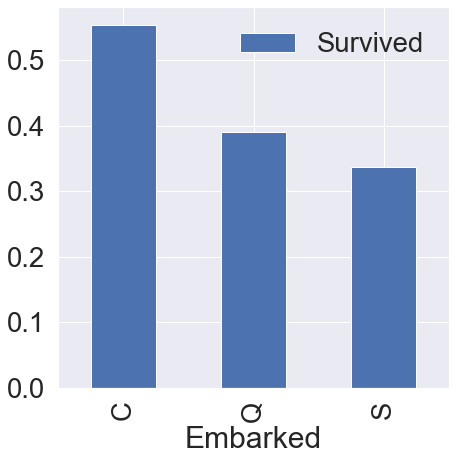

In [45]:
f,ax = plt.subplots(1,1,figsize=(7,7))
df_train[['Embarked','Survived']].groupby(['Embarked'], as_index = True).mean().plot.bar(ax=ax)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

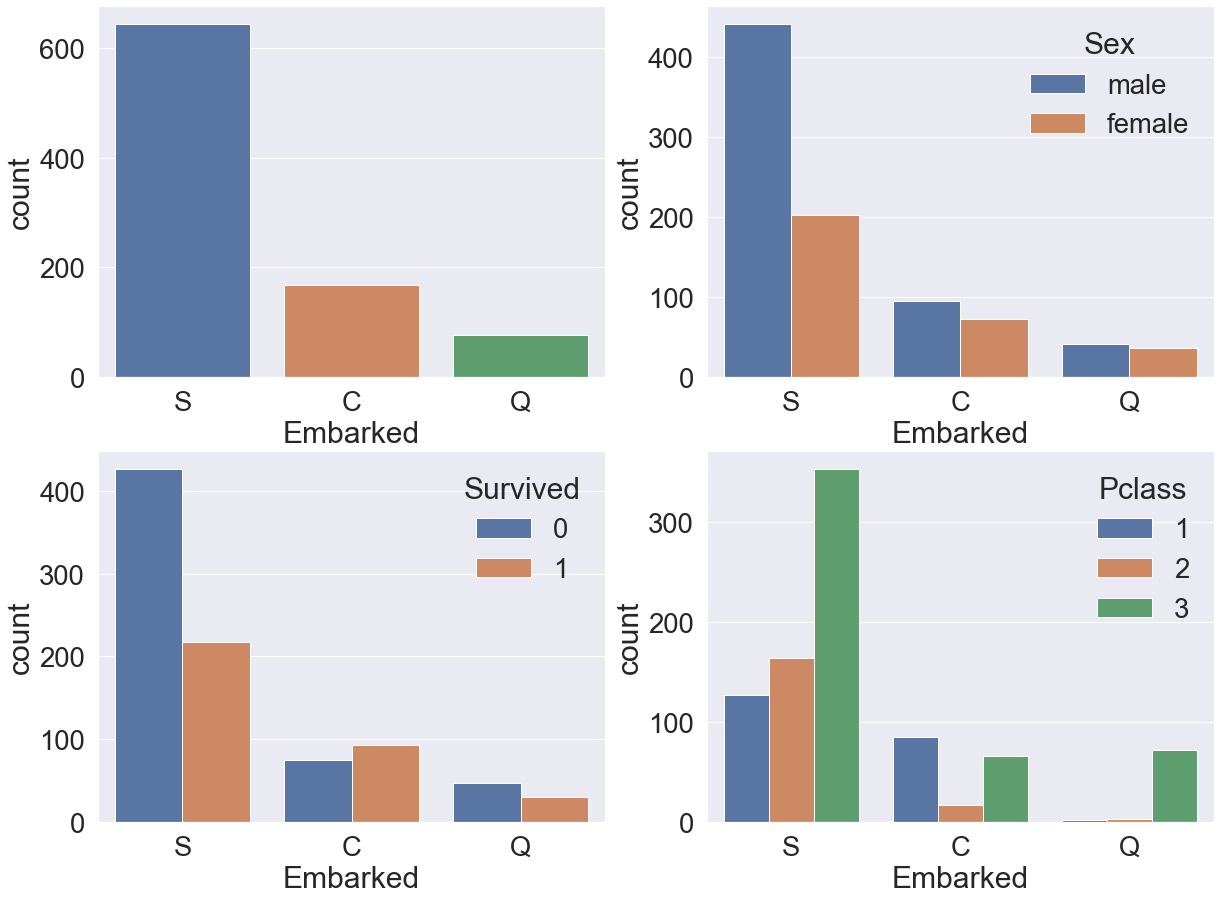

In [46]:
f,ax =plt.subplots(2,2,figsize=(20,15))
sns.countplot('Embarked', data=df_train, ax = ax[0,0])
sns.countplot('Embarked', hue = 'Sex', data = df_train , ax = ax[0,1])
sns.countplot('Embarked', hue = 'Survived' , data = df_train , ax= ax[1,0])
sns.countplot('Embarked', hue = 'Pclass' , data = df_train ,ax = ax[1,1])


### Family  - SibSp + Parch

In [47]:
df_train['FamilySize']  = df_train['SibSp'] + df_train['Parch'] + 1

In [50]:
print(df_train['FamilySize'].max())
print(df_train['FamilySize'].min())
print(df_train['FamilySize'].mean())

11
1
1.904601571268238


<AxesSubplot:xlabel='FamilySize'>

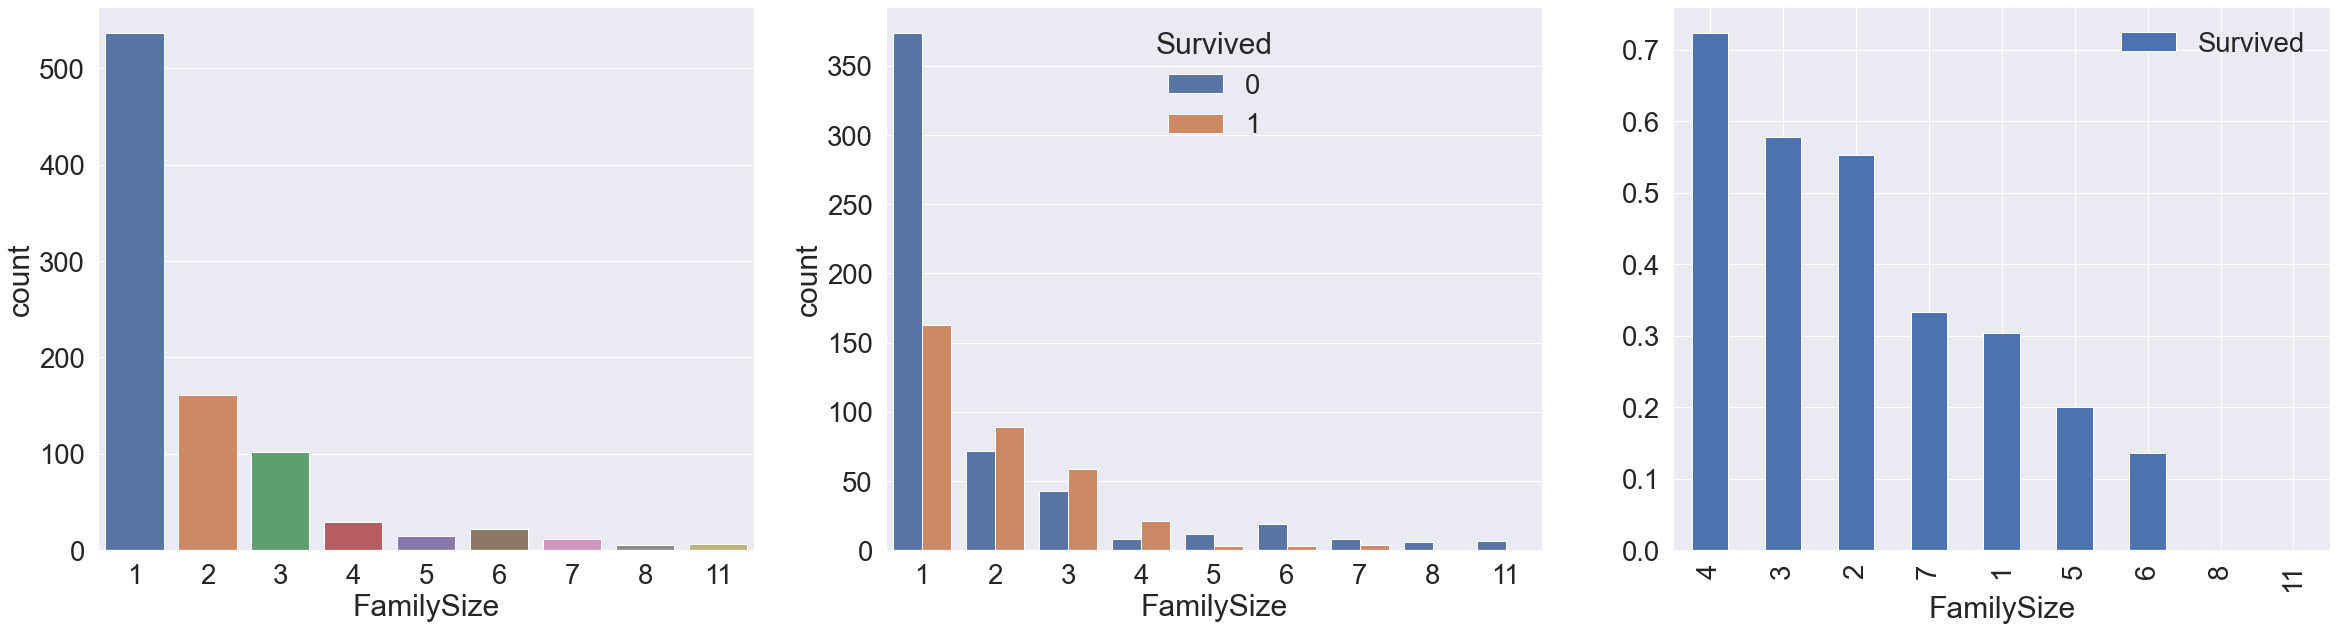

In [54]:
f,ax = plt.subplots(1, 3, figsize=(40,10))
sns.countplot('FamilySize', data = df_train , ax = ax[0])
sns.countplot('FamilySize', hue = 'Survived' ,data = df_train, ax =ax[1])
df_train[['FamilySize', 'Survived']].groupby(['FamilySize'] , as_index = True).mean().sort_values(by = 'Survived', ascending = False).plot.bar(ax = ax[2])

### Fill Null in Age

In [63]:
df_train['Age'].isnull().sum()

177

In [64]:
df_train['Age'].mean()

29.69911764705882

In [67]:
df_train['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.') # 정규표현식을 뽑아주는
df_test['Initial'] = df_train['Name'].str.extract('([A-Za-z]+)\.')

In [68]:
pd.crosstab(df_train['Initial'], df_train['Sex']).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1
